In [1]:
import pickle
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import random

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_dataset(filename):
    pickle_in=open(filename,"rb")
    Dataset=pickle.load(pickle_in)
    pickle_in.close()
    return Dataset
def data_labels(Dataset):
    X=[]
    Y=[]
    for val,lab in Dataset:
        X.append(val)
        Y.append(lab)
    X=np.array(X).reshape(-1,90)
    Y=np.array(Y)
    return X,Y

In [12]:
def train(filename):
    Dataset=load_dataset(filename)
    random.shuffle(Dataset)
    X,Y=data_labels(Dataset)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
    svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, Y_train) 
    svm_predictions = svm_model_linear.predict(X_test) 
    accuracy = svm_model_linear.score(X_test, Y_test) 
    print(accuracy)
    cm = confusion_matrix(Y_test, svm_predictions) 
    sns.heatmap(cm, annot=True)
    plt.show()
    return svm_model_linear

0.9651162790697675


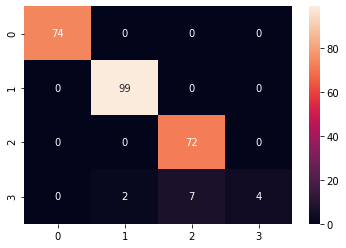

['model.pkl']

In [13]:
import joblib
model=train("Dataset.pickle")
joblib.dump(model,'model.pkl')
    

In [7]:
Dataset=load_dataset("Dataset.pickle")
random.shuffle(Dataset)
X,Y=data_labels(Dataset)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)



In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
score=[]
for i in range(10,200,10):
    rf = RandomForestClassifier(n_estimators=i, random_state=39, max_depth=4)
    rf.fit(X_train, Y_train)
    pred = rf.predict(X_test)
    accuracy = rf.score(X_test, Y_test)
    #cm = confusion_matrix(Y_test, pred) 
    #sns.heatmap(cm, annot=True)
    score.append(accuracy)
    #break
#plt.show()
#plt.savefig('6.png')
print(score)

In [21]:
score2=[]
for i in range(10,200,10):
    svm_model_linear = SVC(kernel = 'linear', C = 1,cache_size=i).fit(X_train, Y_train) 
    svm_predictions = svm_model_linear.predict(X_test) 
    accuracy = svm_model_linear.score(X_test, Y_test)
    score2.append(accuracy)
    #cm = confusion_matrix(Y_test, svm_predictions) 
    #sns.heatmap(cm, annot=True)
    #break
#plt.show()
#plt.savefig('7.png')
print(score2)

[0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039, 0.9922480620155039]


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


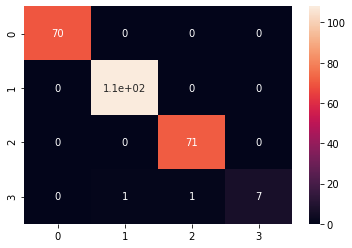

[0.9922480620155039]


<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.linear_model import LogisticRegression
score3=[]
for i in range(120,200,10):
    lr = LogisticRegression(C=1.0,max_iter=i).fit(X_train, Y_train) 
    predictions = lr.predict(X_test) 
    accuracy = lr.score(X_test, Y_test)
    score3.append(accuracy)
    cm = confusion_matrix(Y_test, predictions) 
    sns.heatmap(cm, annot=True)
    break

plt.show()
plt.savefig('8.png')
print(score3)

In [23]:
x=[]
for i in range(10,200,10):
    x.append(i)

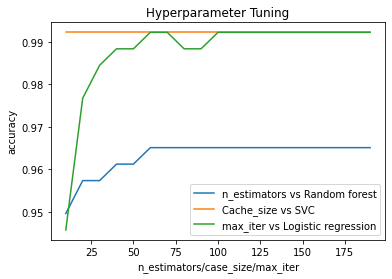

In [24]:
plt.plot(x, score, label = "n_estimators vs Random forest")
plt.plot(x, score2, label = "Cache_size vs SVC")
plt.plot(x, score3, label = "max_iter vs Logistic regression")
plt.xlabel("n_estimators/case_size/max_iter")
plt.ylabel("accuracy")
plt.title("Hyperparameter Tuning")
plt.legend()
plt.savefig('5.png')

In [25]:
max(score3)

0.9922480620155039

In [15]:
from sklearn.metrics import roc_curve

In [14]:
X=joblib.load('model.pkl')

In [15]:
X.predict(X_test)

array([2, 1, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 3, 2,
       2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 3, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1,
       2, 1, 1, 2, 3, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1,
       2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 3])

In [19]:
X_test[0]

array([  2,   4,   2,   0,   3,   4,   1,   3,   1,   1,   0,   2,  10,
        16,  19,  41, 126,  83,  24, 181,  41,   4,  69,  71,  21,  12,
        84,   0,  21,  38,  13,  73,  12,  22,  30,  42,  20, 129,  99,
        30,  88,  63,  29,  73,   0,   1,  20,  96,   6,  17,  23,   6,
         6,  21,   3,  16,   3,   6,  17,   2,   4,   8,   5,   0,   6,
         3,   0,   3,   1,   0,   1,   2,   0,   0,   2,   0,   1,   2,
         0,   0,   1,   0,   0,   2,   0,   0,   1,   0,   1,   1])